# Introduction to Image Processing

Credit: Colin Jemmott

### Description

In today's lecture, "Images are Data!" you learned that raster images are a esentially just arrays of numbers, and that these numbers can be manipulated to modify the image.  In this project we will use `Pillow` (a fork of the Python Image Library) and `numpy` to open, display,and manipulate images.


### Note

This notebook uses [pillow](https://pillow.readthedocs.io/en/latest/).  It should already be installed in your environment, but if not you can install it:
```
! pip install Pillow
```

### References

* http://paulbourke.net/dataformats/bitmaps/

## Step 1: Open and Display

In [1]:
from PIL import Image
from PIL import ImageFilter

In [2]:
image = Image.open("data/test.bmp")

In [3]:
display(image)

## Step 2: Scale

Hmmm, that looks very small.  Let's make sure it is, and then scale it up.

In [4]:
image.size

(8, 4)

In [5]:
maxsize = (400, 200)
largeImage = image.resize(maxsize)

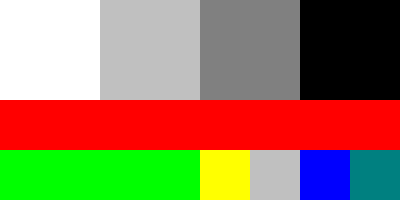

In [6]:
display(largeImage)

## Step 3: Let's look at the data!

In [7]:
import numpy as np

In [8]:
imageData = np.array(image)
imageData

array([[[255, 255, 255],
        [255, 255, 255],
        [192, 192, 192],
        [192, 192, 192],
        [128, 128, 128],
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255, 255, 255],
        [255, 255, 255],
        [192, 192, 192],
        [192, 192, 192],
        [128, 128, 128],
        [128, 128, 128],
        [  0,   0,   0],
        [  0,   0,   0]],

       [[255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0],
        [255,   0,   0]],

       [[  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [  0, 255,   0],
        [255, 255,   0],
        [192, 192, 192],
        [  0,   0, 255],
        [  0, 128, 128]]], dtype=uint8)

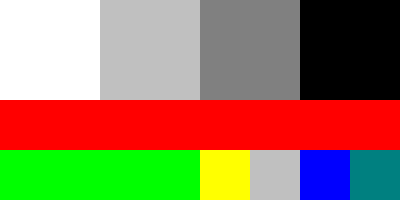

In [9]:
Image.fromarray(imageData).resize(maxsize)

## Step 4: Manipulating the Image

Ok, take a good look at the `test.bmp` image and the resulting array above.  Can you figure out how the numbers map to the image?  

*Hint*:
* The image is 8 pixels by 4 pixels
* For each pixel there are 3 color intensities (RGB)

Once you figure the mapping between the array and the image, write some code that will remove all of the red from that image.  Then display it to verify (it should have no red!).

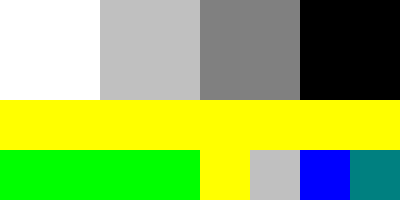

In [11]:
imageData[2,:,1] = 255
Image.fromarray(imageData).resize(maxsize)

# Project 1: Bigger Image

Now that you have the basics down, let's start working with a larger image, `bear.jpg`.

The goal of this project is for you to get comfortable manipulating images in Python.  It is best to start by reviewing what is possible in the [Pillow documentation](https://pillow.readthedocs.io/en/latest/).  There are lots of fun things like making thumbnails, rotating, filters, cropping, layering, etc.

Do at least three different types of modifications to `bear.jpg`.

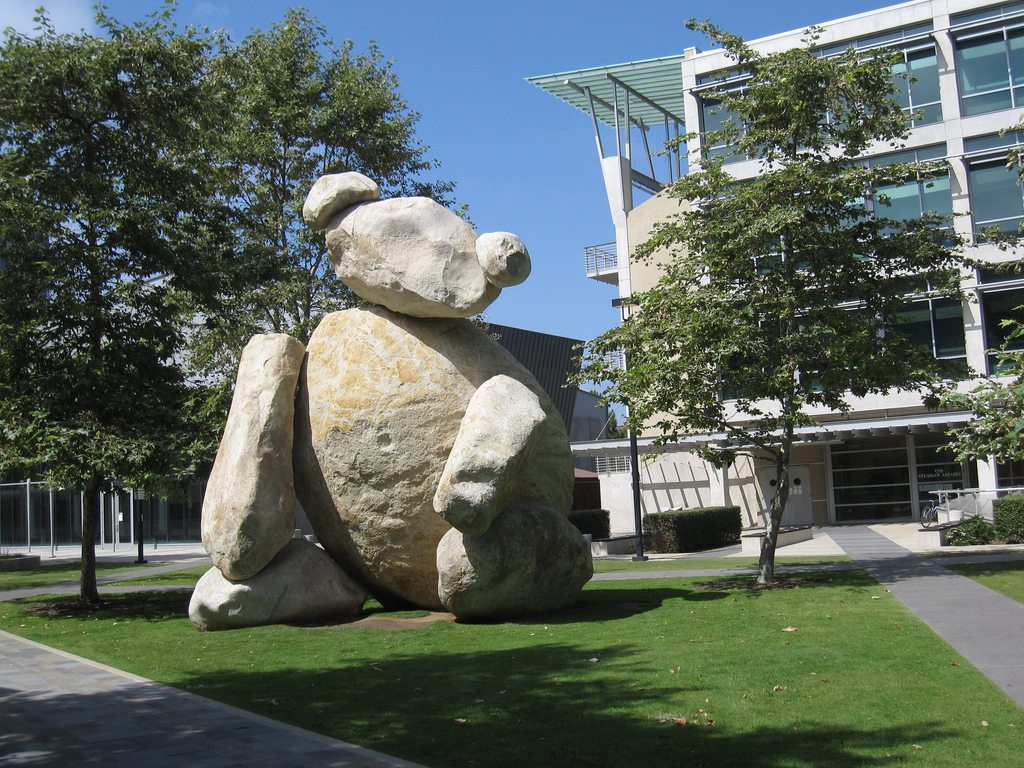

In [14]:
bear = Image.open('data/bear.jpg')
bear

In [15]:
bearData = np.array(bear)
bearData

array([[[174, 198, 234],
        [173, 197, 233],
        [173, 197, 233],
        ...,
        [ 51,  59,  61],
        [ 47,  54,  60],
        [ 51,  55,  66]],

       [[173, 197, 233],
        [173, 197, 233],
        [173, 197, 233],
        ...,
        [ 56,  63,  73],
        [ 62,  69,  77],
        [ 67,  74,  80]],

       [[175, 198, 232],
        [175, 198, 232],
        [175, 198, 232],
        ...,
        [ 68,  77,  86],
        [ 63,  73,  83],
        [ 58,  71,  80]],

       ...,

       [[ 54,  57,  66],
        [ 50,  54,  63],
        [ 48,  52,  61],
        ...,
        [ 94, 120,  59],
        [ 92, 120,  59],
        [ 87, 117,  53]],

       [[ 39,  42,  49],
        [ 38,  41,  48],
        [ 36,  41,  47],
        ...,
        [ 94, 118,  60],
        [ 90, 114,  54],
        [104, 130,  67]],

       [[ 30,  33,  40],
        [ 31,  36,  40],
        [ 32,  37,  41],
        ...,
        [101, 120,  64],
        [ 85, 106,  47],
        [ 85, 109,  47]]

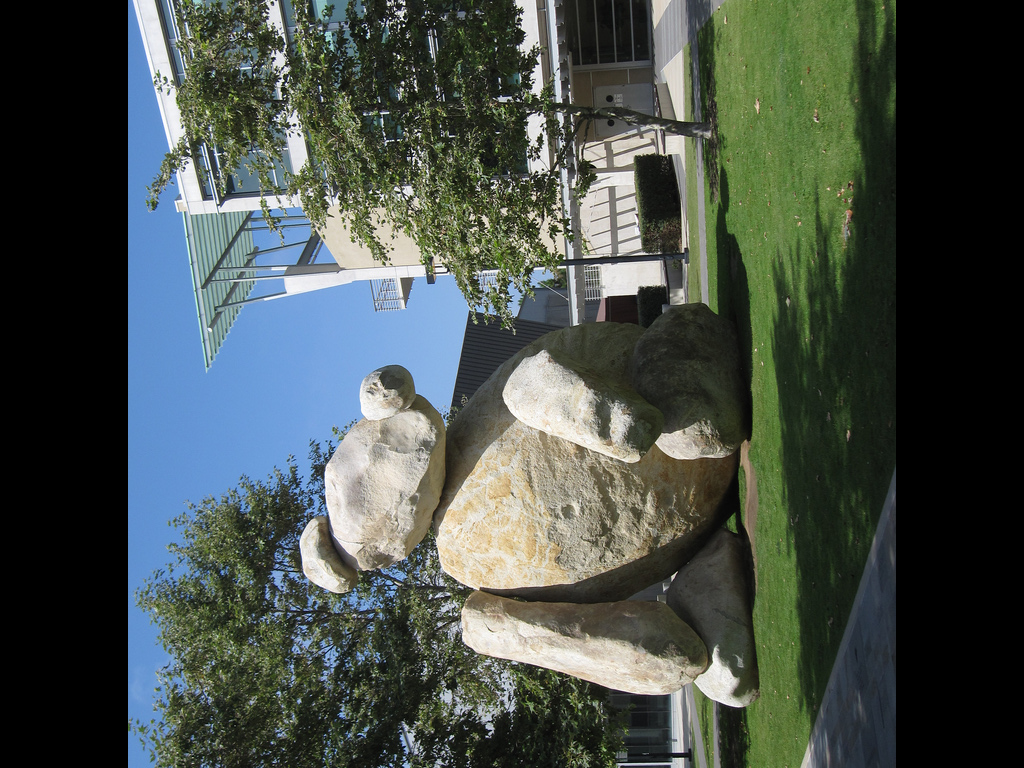

In [16]:
bear.rotate(90)

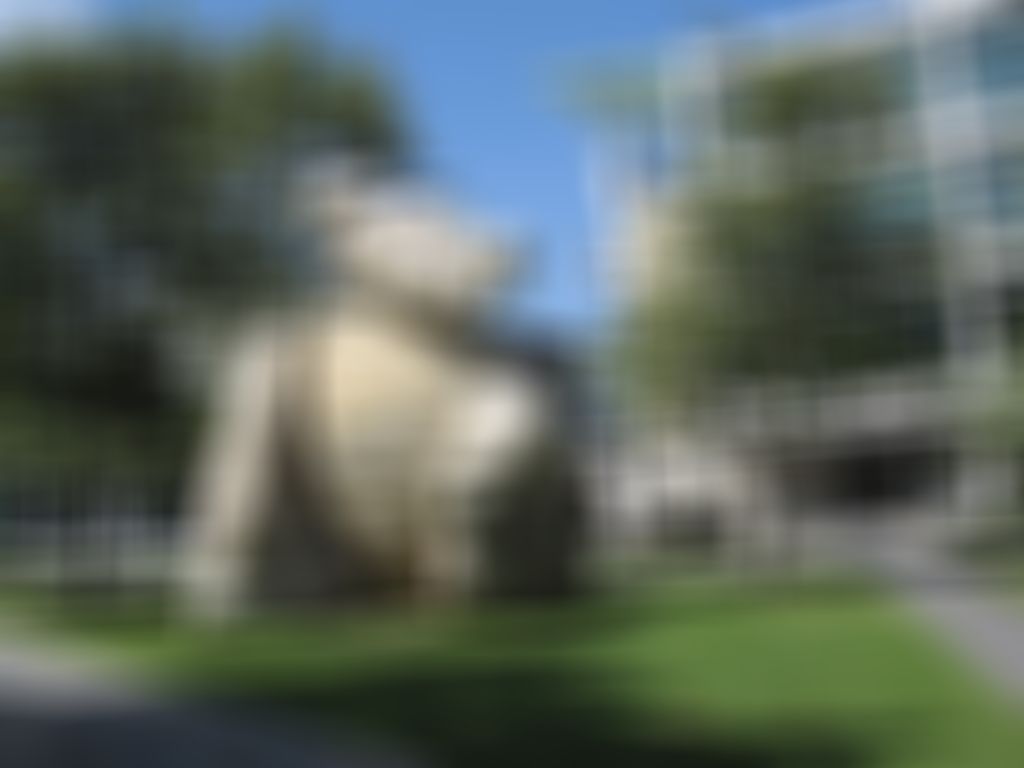

In [36]:
#bear.filter
bear.filter(ImageFilter.BoxBlur(30))

# Project 2: Edge Detection

Begin with the twitter logo image `data/twitter.png`, then try it on `data/bear.jpg` from above.

## Goal

For this project you will implement a very basic edge detection algorithm by following these steps:

1. Convert the image to grayscale
2. Take the spatial gradient of the image
3. Apply a threshold to the gradient
4. Convert the result back to an image and display it

## Note

Edge detection is an active area of research with some pretty impressive algorithms.  This one is extremely simple, and so the results are only ok.

After you finish this, you might enjoy reading the Wikipedia article on [Edge Detection](https://en.wikipedia.org/wiki/Edge_detection).

## Hints

* The `.convert('L')` method translates the image to grayscale.
* There are many different ways to solve this problem, but using [`numpy.gradient`](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.gradient.html) will make it much easier.
    - gradient outputs the differences between the pixels in the horizontal and vertical directions.

In [16]:
np.gradient([[0, 1, 2, 3, 4, 7], [0, 1, 2, 3, 4, 7]])

[array([[0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0.]]), array([[1., 1., 1., 1., 2., 3.],
        [1., 1., 1., 1., 2., 3.]])]

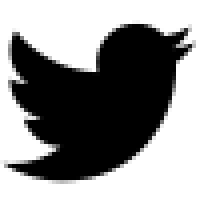

In [22]:
twitter = Image.open('data/twitter.bmp').convert('L')
twitter
# harder: 
#twitter_array = np.array(twitter)
#gradx = np.gradient(np.array(twitter))[0]
#gradx[:,100]

In [41]:
twitter_array.shape

(200, 200)

In [42]:
gradx.shape

(200, 200)

In [43]:
threshold = 100
gradx > 100

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

# Stretch Project: Image Processing From Scratch

First, don't worry if you don't complete all (or any) of this - this section is a stretch goal and different students come in to this class with very different levels of programming.

### Project Goal

Write your own Instagram filter!

The plot below shows histograms of the RGB colorspace.  Think about how you might manipulate the pixels to change those histograms and "enhance" your favorite photo.

In [ ]:
%matplotlib notebook
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

num_bins = 50

fig, ax = plt.subplots(3, sharex=True)

# the histogram of the data
n, bins, patches = ax[0].hist(imageData[:,:,0].flatten(), num_bins, color="red")
n, bins, patches = ax[1].hist(imageData[:,:,1].flatten(), num_bins, color="green")
n, bins, patches = ax[2].hist(imageData[:,:,2].flatten(), num_bins, color="blue")

plt.show()